# Interaction value plots

In [12]:
from utils import get_explanations
import shap
import matplotlib.pyplot as plt
from pathlib import Path
explaination_path = '/home/lw754/masterproject/cross-modal-interaction/results/VEC2XOR_synergy_epochs_200_concat_early/seed_1/'
modality_names = ['Modality 1', 'Modality 2']
n_classes = 2
save_path = '/home/lw754/masterproject/images'

In [14]:
explaination_path = Path(explaination_path)
results = get_explanations(explaination_path,modality_names,n_classes)

Results is a dict that contains shap.Explanation objects. There are various explanation objects, which are explained below:
    - Single Interaction Split: The shapley values and the shaply interaction values are stored in the explanation at sample base level. The interactions are split into the individual partial interactions and are not totalled.
    - Single Class: This is a single interaction split, but only for a single class
    - Single: The shapley values and the shaply interaction values are saved in the explanation at sample base level. The interactions are totalled.
    - Mean: Mean over all samples in Single


In [7]:
results.keys()

dict_keys(['Single Interaction Split', 'Single Class 0', 'Single Class 1', 'Mean', 'Single'])

## How to plot

If you want to plot the mean over the whole test dataset, use mean Explanation:

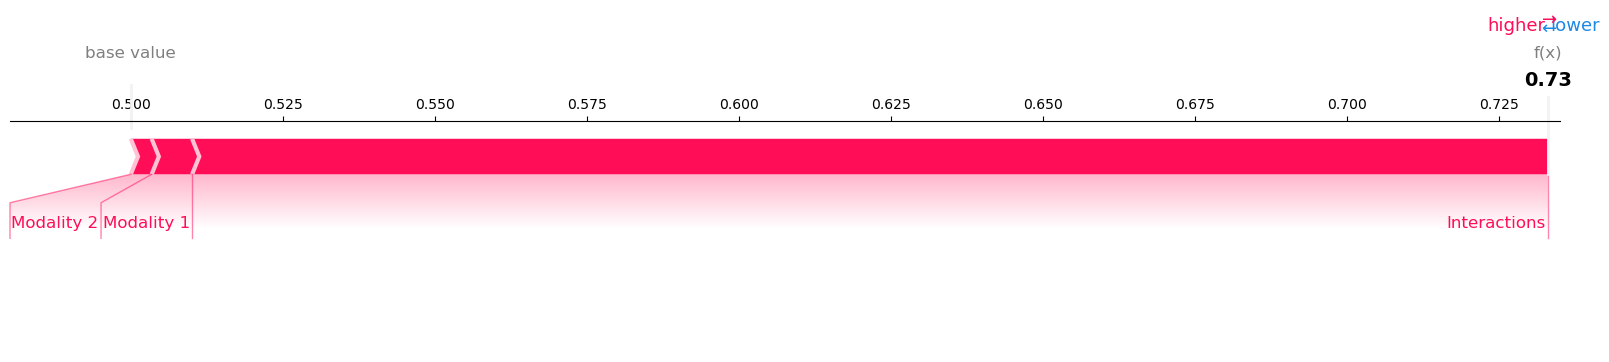

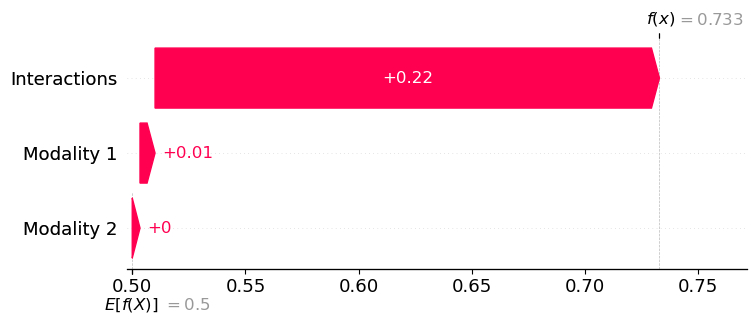

In [8]:
exp = results['Mean']
shap.force_plot(exp[0], show=True, matplotlib=True)
shap.plots.waterfall(exp[0],show=True)

And for single split: and sample 3

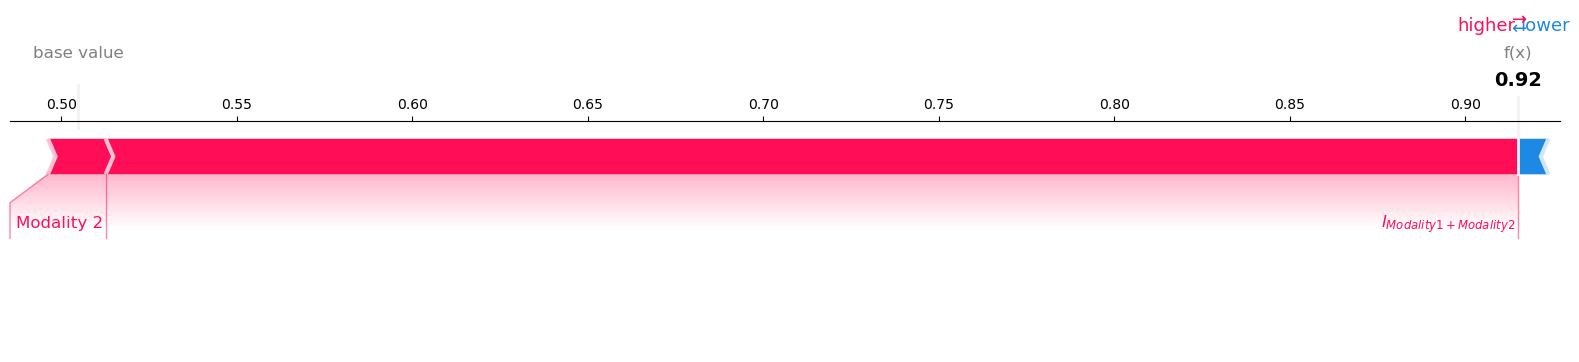

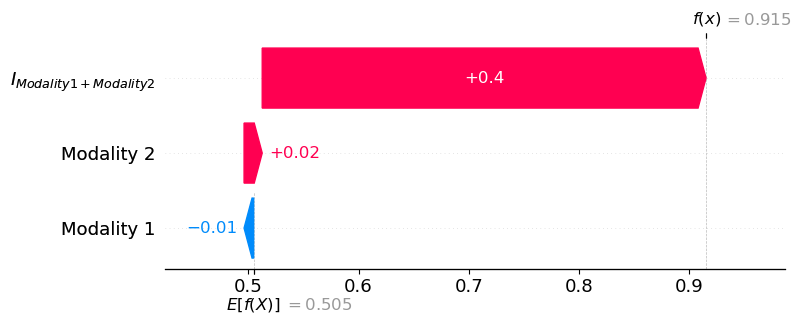

In [21]:
exp = results['Single Interaction Split']
shap.force_plot(exp[2], show=True, matplotlib=True)
shap.plots.waterfall(exp[2],show=True)

If you want to save the explanations as pdf:

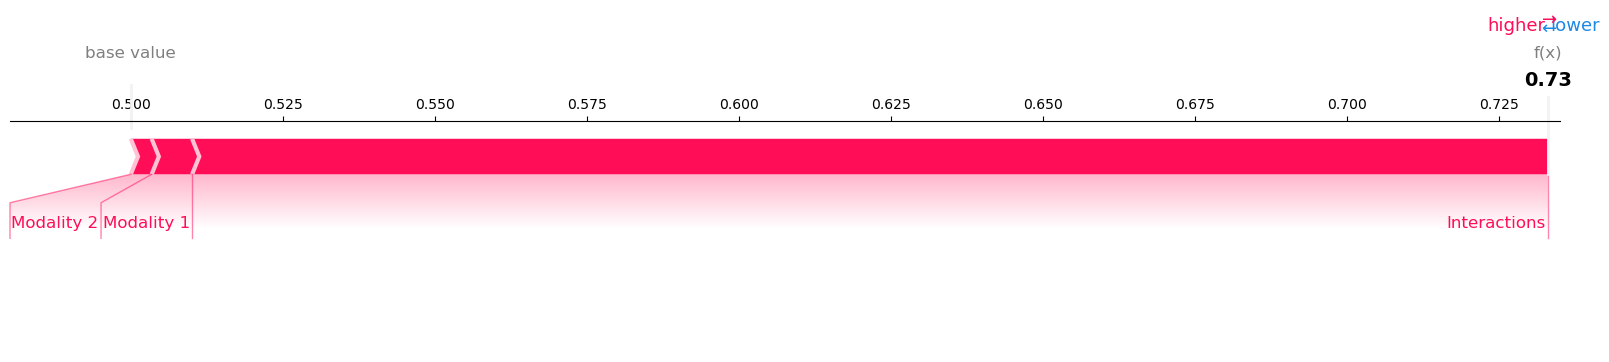

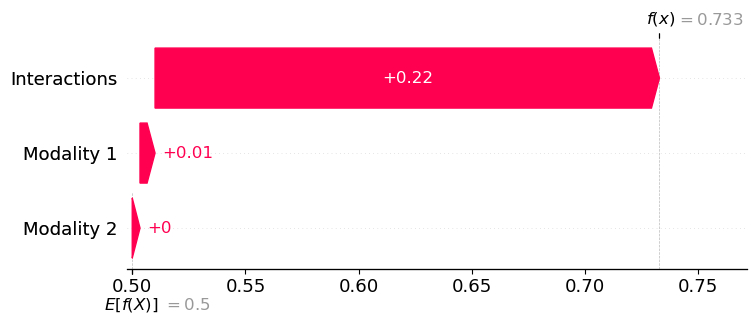

In [24]:
exp = results['Mean']
shap.force_plot(exp[0], show=False, matplotlib=True)
plt.savefig(explaination_path/'force_plot.pdf',bbox_inches='tight')
plt.show()

shap.plots.waterfall(exp[0],show=False)
plt.savefig(explaination_path/'waterfall_plot.pdf',bbox_inches='tight')
plt.show()